# Super Awesome Fast Single Pixel Bilateral Composite Idea For Masking...

In [1]:
import acimops # " 's Cython Image Ops"
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PIM

def loadPixels(path):
    pim = PIM.open(fp=path);
    return np.array(pim);

def saveImage(pixels, output_path):
    if(pixels.dtype.kind in 'f'):
        px = (pixels * 255).astype(np.uint8);
    else:
        px=pixels;  
    PIM.fromarray(px).save(output_path);
    
def showMask(p):
    fig = plt.imshow(p);
    fig.set_cmap('gray')
    plt.axis('off');

## Let's load a test image

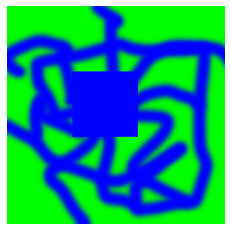

In [2]:
pim = loadPixels('./testim.png');
pixels = np.array(pim);
plt.imshow(pixels)
plt.axis('off');

## Let's pick a few mask pixels...
Ideally, we will create an interface for this. But, for now, let's just pick a few pixels using matplotlib's interactive view... You should see the coordinates and value of the point under the mouse as you move the mouse around...

<IPython.core.display.Javascript object>


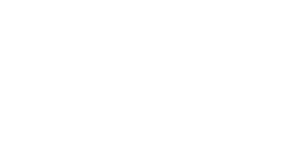

In [3]:
%matplotlib notebook
%matplotlib notebook
plt.imshow(pixels);
# plt.imshow(mask);


In [4]:
# You might want to turn off the notebook view for regular usage
%matplotlib inline

### For this example I will use the following pixels:
`imcoords = np.array([[89,85], [40,180], [145,50]]);`


In [5]:
imcoords = np.array([[89,85], [40,180], [145,50]]);

## Compute the mask
You can use `acimops.bilateral.getBilateralPixelMask` to get the mask corresponding to a single pixel...

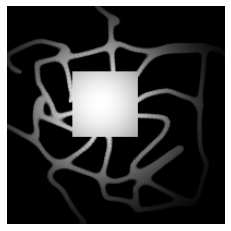

In [6]:
mask = acimops.bilateral.getBilateralPixelMask(image=pixels,
                                              pixel_coordinates=imcoords[0],
                                              sigma_space=50.0,
                                              sigma_value=0.05);

showMask(mask)

### Maximum of several filtered input pixels...
Or you can use `acimops.bilateral.maxOfPixelMasks` to compute the maximum of several filtered pixels....

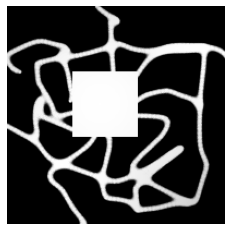

In [7]:
mask = acimops.bilateral.maxOfPixelMasks(image=pixels,
                                              pixel_coordinates=imcoords,
                                              sigma_space=200.0,
                                              sigma_value=0.05);
showMask(mask)

### Thresholding...
You can threshold the filtered result to get a hard mask...

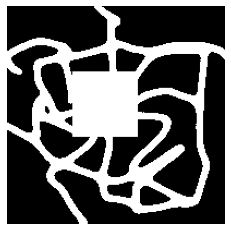

In [8]:
mask = acimops.bilateral.maxOfPixelMasks(image=pixels,
                                              pixel_coordinates=imcoords,
                                              sigma_space=200.0,
                                              sigma_value=0.05);

threshold = 0.5;
mask[mask>threshold]=1;
mask[mask<threshold]=0;
showMask(mask)
saveImage(mask, './maskThreshold_0.5.png')